In [5]:
import pandas as pd

In [6]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv', sep=',')

In [7]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                    0.0        0.0        0.0       0.0   
1             ...                 3272.0     3455.0     3261.0       0.0   
2             ...                14331.0    14948.0    15549.0    1518.0   
3             ...                28314.0    28959.0    29547.0    2000.0   
4             ...                20940.0    19146.0    19131.0    2000.0   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     689.0       0.0       0.0       0.0       0.0   
1    1000.0    1000.0    1000.0       0.0    2000.0   
2    1500.0    1000.0    1000.0    1000.0    5000.0   
3    2019.0    1200.0    1100.0    1069.0    1000.0   
4   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 25 columns]

In [8]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

30000

In [9]:
#TODO
df.isnull().sum(axis=0)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
df['SEX'].describe()

count    30000.000000
mean         1.603733
std          0.489129
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: SEX, dtype: float64

In [11]:
dfsex = df[['ID','SEX']]
dfsex.groupby(by='SEX').count()

ID
SEX       
1    11888
2    18112

In [12]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
# 8656
#TODO
dffemale = df[['ID', 'SEX', 'EDUCATION']].groupby(['SEX', 'EDUCATION']).get_group((2,2)).ID.count()
dffemale

8656

In [13]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
dpnm = df.groupby('default.payment.next.month').median()
dpnm = dpnm.filter(regex='PAY_*|BILL_*').T
dpnm

default.payment.next.month        0        1
PAY_0                           0.0      1.0
PAY_2                           0.0      0.0
PAY_3                           0.0      0.0
PAY_4                           0.0      0.0
PAY_5                           0.0      0.0
PAY_6                           0.0      0.0
BILL_AMT1                   23119.5  20185.0
BILL_AMT2                   21660.5  20300.5
BILL_AMT3                   20202.5  19834.5
BILL_AMT4                   19000.0  19119.5
BILL_AMT5                   17998.0  18478.5
BILL_AMT6                   16679.0  18028.5
PAY_AMT1                     2459.5   1636.0
PAY_AMT2                     2247.5   1533.5
PAY_AMT3                     2000.0   1222.0
PAY_AMT4                     1734.0   1000.0
PAY_AMT5                     1765.0   1000.0
PAY_AMT6                     1706.0   1000.0

In [14]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table('SEX', 'EDUCATION', 'MARRIAGE')

MARRIAGE          0         1         2         3
EDUCATION                                        
0               NaN  1.500000  1.400000       NaN
1          1.750000  1.545943  1.613306  1.400000
2          1.833333  1.653610  1.581197  1.611111
3          1.727273  1.633695  1.531692  1.650485
4               NaN  1.653846  1.661765  1.666667
5               NaN  1.680000  1.637795  1.666667
6               NaN  1.500000  1.476190  2.000000

In [15]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO
import numpy
variants = [chr(n) for n in range(ord('A'), ord('G'))]
selector = [
    (df['LIMIT_BAL'] <= 10000),
    (df['LIMIT_BAL'] > 10000) & (df['LIMIT_BAL'] <= 100000),
    (df['LIMIT_BAL'] > 100000) & (df['LIMIT_BAL'] <= 200000),
    (df['LIMIT_BAL'] > 200000) & (df['LIMIT_BAL'] <= 400000),
    (df['LIMIT_BAL'] > 400000) & (df['LIMIT_BAL'] <= 700000),
    (df['LIMIT_BAL'] > 700000)
]

df['LB_TAG'] = numpy.select(selector, variants)
df[['ID', 'LIMIT_BAL', 'LB_TAG']].head()

ID  LIMIT_BAL LB_TAG
0   1    20000.0      B
1   2   120000.0      C
2   3    90000.0      B
3   4    50000.0      B
4   5    50000.0      B

In [16]:
%matplotlib inline

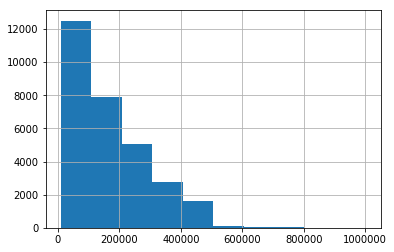

In [17]:
df['LIMIT_BAL'].hist()

In [18]:
from matplotlib import pyplot as plt

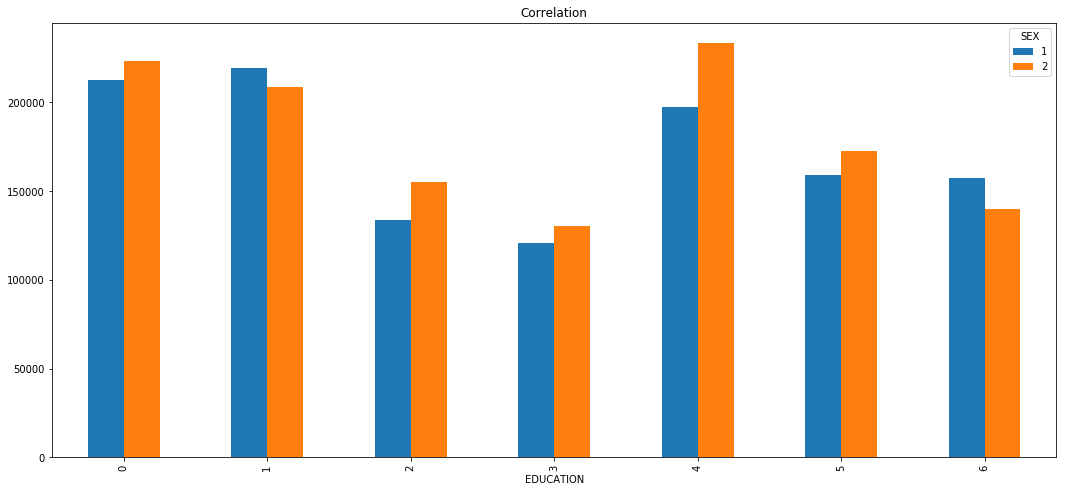

In [19]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
fig, ax = plt.subplots(figsize=(18, 8))
df_limit = df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX').plot(kind='bar', ax=ax, title='Correlation')

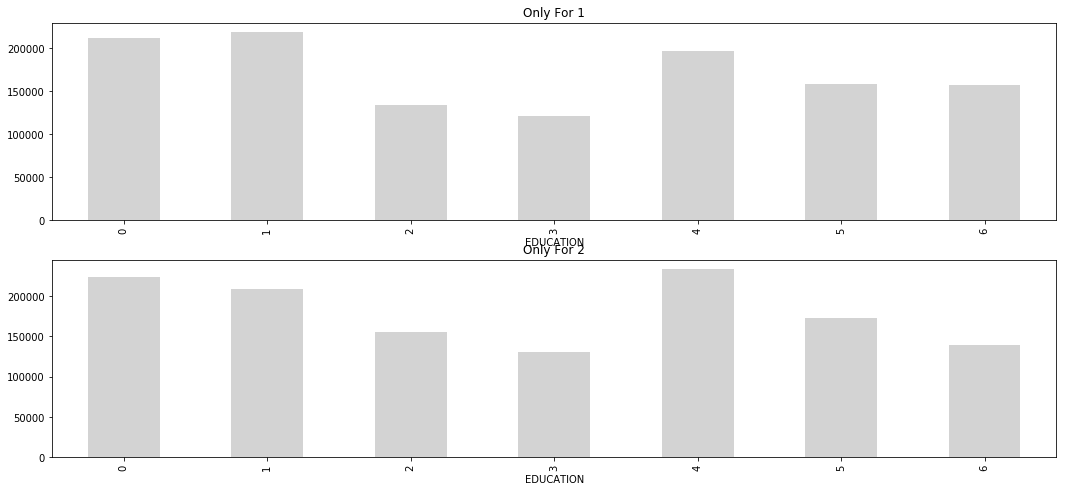

In [20]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов
# fig, ax = plt.subplots(figsize=(18, 8))
fix, ax = plt.subplots(nrows=2, ncols=1)
df_limit = df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX')
for i, column in enumerate(df_limit.columns):
    df_limit[column].plot(kind='bar', ax=ax[i], figsize=(18,8), title='Only For {0}'.format(column), color='lightgrey')

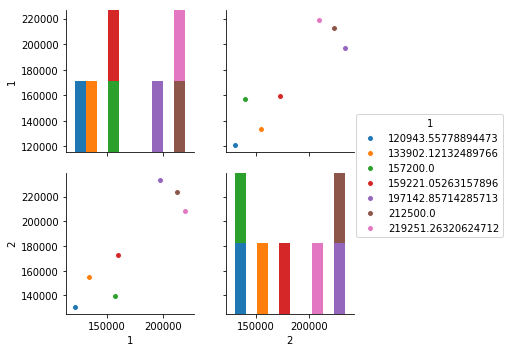

In [23]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn
seaborn.pairplot(df_limit, hue=1)

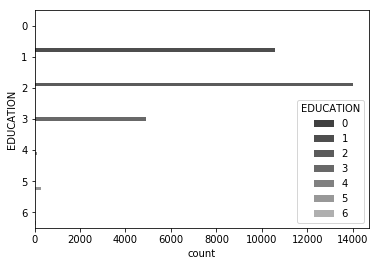

In [32]:
# Am I right that these graphic shows me how many people in my set do have specific degree?
seaborn.countplot(y='EDUCATION', data=df, hue='EDUCATION', palette='Greys_d')

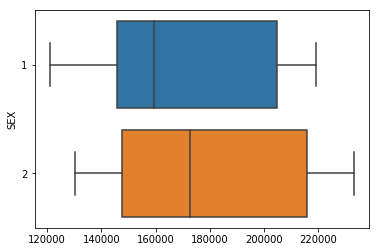

In [34]:
# Shows limit range by gender
seaborn.boxplot(data=df_limit, orient='h')

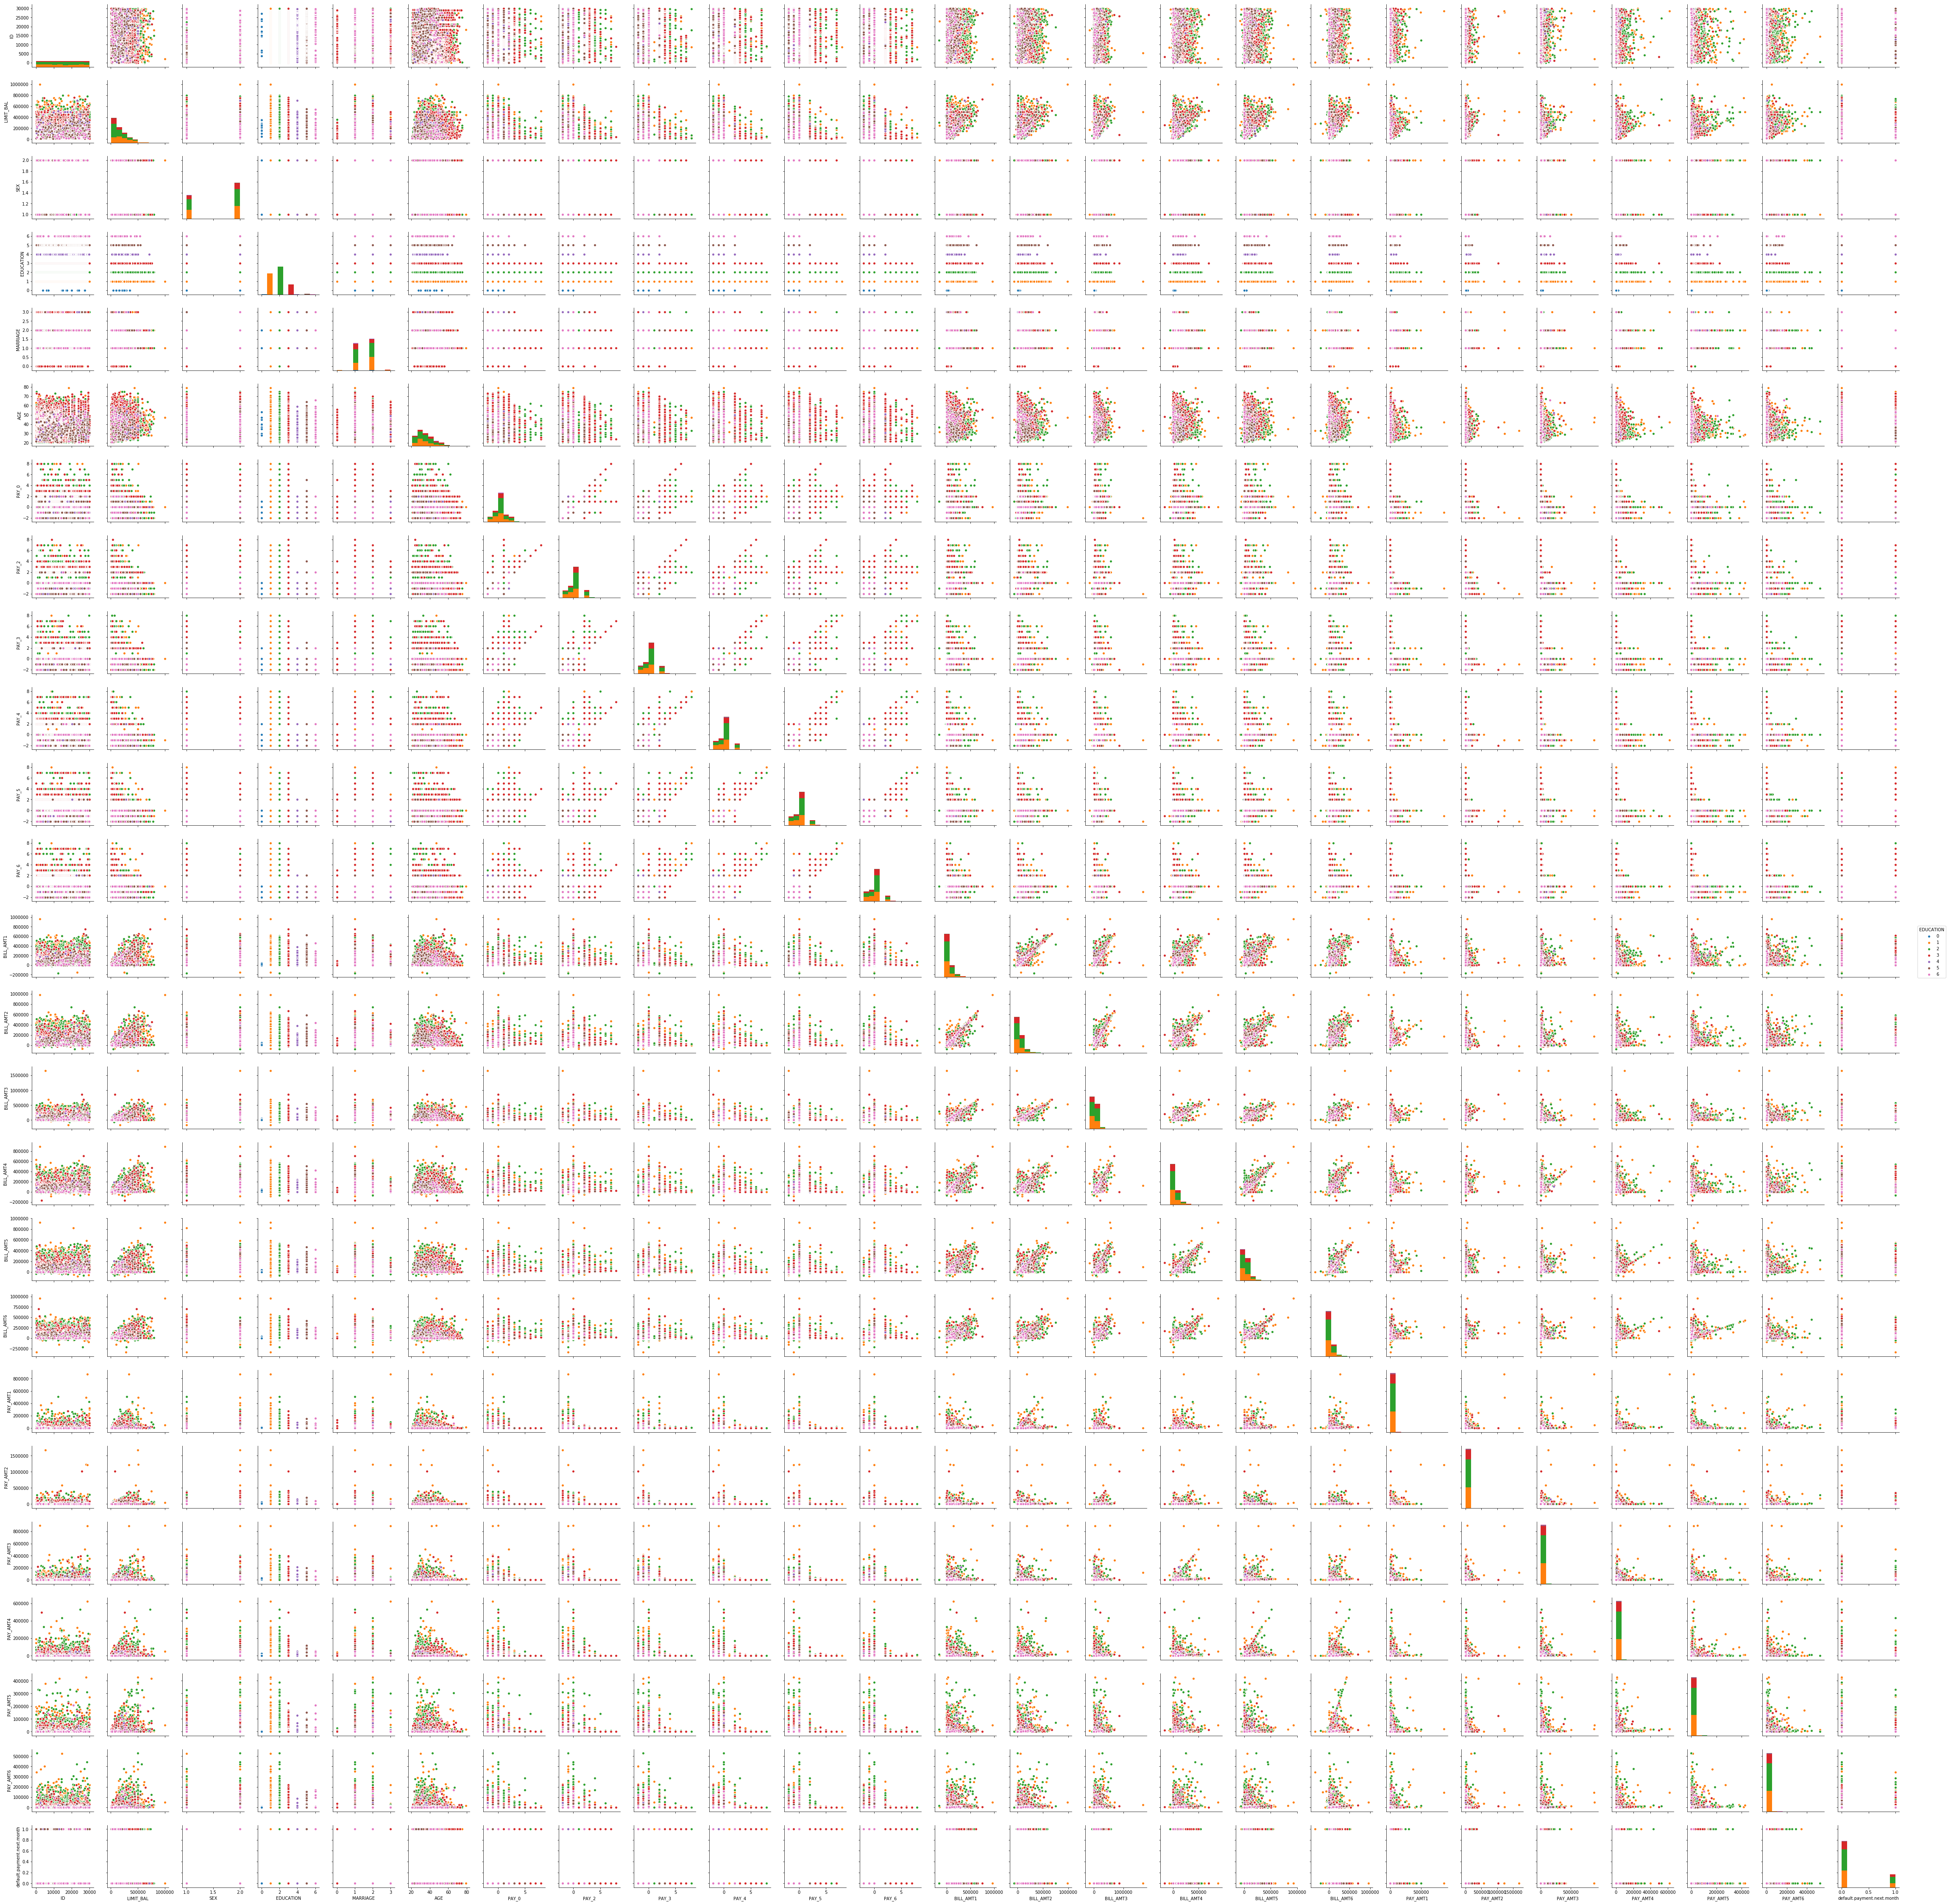

In [35]:
seaborn.pairplot(df, hue='EDUCATION')

In [45]:
df1 = df[['ID', 'EDUCATION', 'LIMIT_BAL', 'SEX', 'default.payment.next.month']]
df1.info()
df1 = df1.set_index('ID')
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
ID                            30000 non-null int64
EDUCATION                     30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
default.payment.next.month    30000 non-null int64
dtypes: float64(1), int64(4)
memory usage: 1.1 MB


EDUCATION  LIMIT_BAL  SEX  default.payment.next.month
ID                                                       
1           2    20000.0    2                           1
2           2   120000.0    2                           1
3           2    90000.0    2                           0
4           2    50000.0    2                           0
5           2    50000.0    1                           0

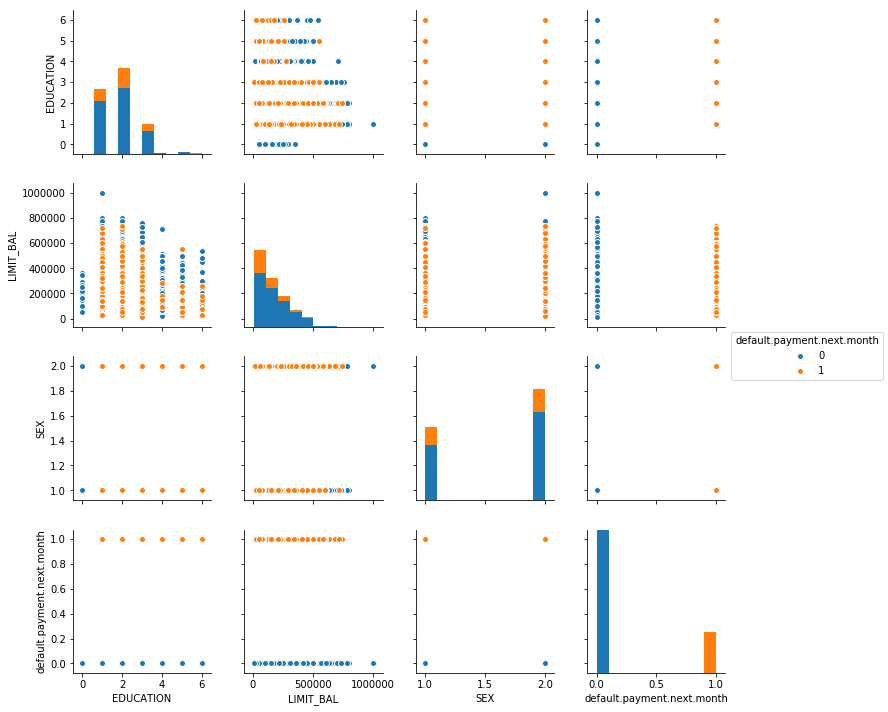

In [47]:
seaborn.pairplot(df1, hue='default.payment.next.month')

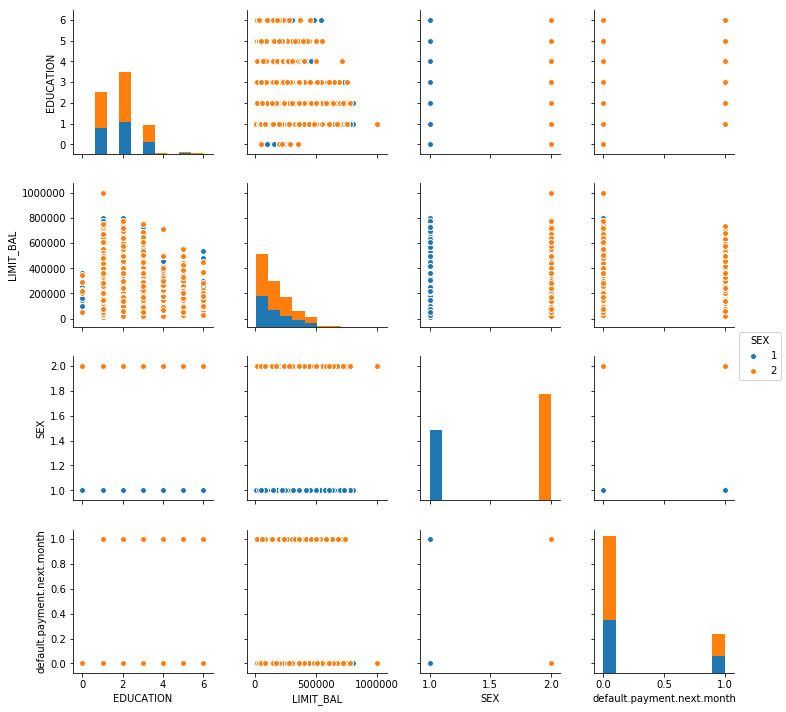

In [48]:
seaborn.pairplot(df1, hue='SEXdefault.payment.next.monthdefault.payment.next.month')